# Handling Imbalanced Data & Metrics for Imbalanced Classification

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.


In this tutorial we will see:

- possible ways to handle an imbalanced class problem using credit card data fom Kaggle.

-  classify the minority class of fraudulent transactions.

## Note: In this notebook we only see methods to handle imbalanced data but not other important machine learning steps including, like feature selection or hyperparameter tuning.

In [66]:
# import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

import os

from sklearn.datasets import make_classification
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

In [128]:

os.getcwd()

'D:\\Emma\\Handling_imbalanced_data'

In [68]:
# load data
df = pd.read_csv(r"D:\Emma\Handling_imbalanced_data\data\creditcard.csv")

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data cleaning

Key Features of  the data:

- Time: Seconds elapsed between the transaction and the first transaction in the dataset.

- Amount: Transaction amount.

- V1-V28: Principal Component Analysis (PCA) transformed features (often provided to anonymize sensitive information).

- Class: The target variable (0 for Non-Fraud, 1 for Fraud).

In [69]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [70]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [71]:


class FraudImbalanceAnalyzer:
    """
    Class to analyze class imbalance in fraud / loan default datasets.

    Assumptions:
    - Binary classification
    - 1 = Fraud / Default (minority class)
    - 0 = Non-Fraud / Good (majority class)
    """

    def __init__(self, df: pd.DataFrame, target_col: str):
        """
        Constructor for the analyzer.

        Parameters:
        - df: pandas DataFrame containing the dataset
        - target_col: name of the target column
        """

        self.df = df                    # Store the dataset
        self.target_col = target_col    # Store the target column name

    def fraud_percentage(self):
        """
        Calculate percentage of fraud and non-fraud samples.

        Returns:
        - fraud_pct: percentage of class 1
        - non_fraud_pct: percentage of class 0
        """

        # Count class frequencies and normalize to proportions (sum = 1)
        proportions = self.df[self.target_col].value_counts(normalize=True)

        # Convert proportions to percentages
        proportions = proportions * 100

        # Extract fraud percentage safely (avoids KeyError)
        fraud_pct = proportions.get(1, 0)

        # Extract non-fraud percentage safely
        non_fraud_pct = proportions.get(0, 0)

        # Return both values
        return fraud_pct, non_fraud_pct

    def imbalance_ratio(self):
        """
        Compute imbalance ratio:
        majority_class_count / minority_class_count

        Example:
        970 non-fraud, 30 fraud → 32.3 : 1
        """

        # Count raw number of samples per class
        counts = self.df[self.target_col].value_counts()

        # Ensure both classes exist
        if 0 not in counts or 1 not in counts:
            raise ValueError("Target column must contain both classes 0 and 1")

        # Compute imbalance ratio (majority / minority)
        ratio = counts[0] / counts[1]

        # Return the computed ratio
        return ratio

    def summary(self):
        """
        Print a clean, business-friendly summary of imbalance.
        """

        # Get fraud and non-fraud percentages
        fraud_pct, non_fraud_pct = self.fraud_percentage()

        # Compute imbalance ratio
        ratio = self.imbalance_ratio()

        # Print formatted summary
        print("📊 Class Imbalance Summary")
        print("-" * 35)
        print(f"Fraud / Default (1): {fraud_pct:.2f}%")
        print(f"Non-Fraud / Good (0): {non_fraud_pct:.2f}%")
        print(f"Imbalance Ratio (Non-Fraud : Fraud) = {ratio:.1f} : 1")

    def plot_distribution(self):
        """
        Plot the class distribution as a bar chart.
        """

        # Count number of samples per class
        counts = self.df[self.target_col].value_counts()

        # Create bar plot
        counts.plot(kind='bar')

        # Label x-axis
        plt.xlabel("Class Label")

        # Label y-axis
        plt.ylabel("Number of Samples")

        # Add title
        plt.title("Class Distribution (Imbalanced Dataset)")

        # Display plot
        plt.show()


In [72]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [73]:
target_column_name = "Class"
analyzer = FraudImbalanceAnalyzer(
    df=df,
    target_col=target_column_name
)


📊 Class Imbalance Summary
-----------------------------------
Fraud / Default (1): 0.17%
Non-Fraud / Good (0): 99.83%
Imbalance Ratio (Non-Fraud : Fraud) = 577.9 : 1


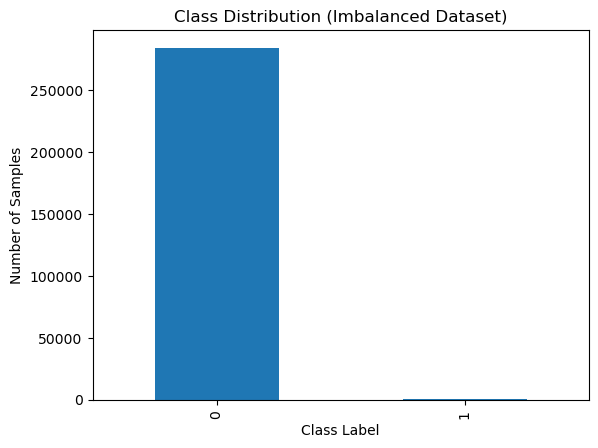

(0.1727485630620034, 99.82725143693798)

In [74]:
analyzer.summary()
analyzer.plot_distribution()
analyzer.fraud_percentage()

#analyzer.imbalance_ratio()

# Baseline Models

In [75]:
# Create Train and Test Sets

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#1. Trains Logistic Regression as a baseline (NO resampling)




In [77]:
print("Class distribution in TRAIN set (original):")
print(Counter(y_train))

print("\nClass distribution in TEST set:")
print(Counter(y_test))


Class distribution in TRAIN set (original):
Counter({0: 227451, 1: 394})

Class distribution in TEST set:
Counter({0: 56864, 1: 98})


In [78]:
# train data
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)


C:\Users\Gezahegne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [79]:
#Evaluate the model
y_pred_baseline = baseline_model.predict(X_test)

print("\nBASELINE MODEL PERFORMANCE (No Resampling)")
print(confusion_matrix(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))



BASELINE MODEL PERFORMANCE (No Resampling)
[[56853    11]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



## Interpretation:

The baseline Logistic Regression model achieves near-perfect accuracy due to class imbalance, but performs poorly on the minority class, with a recall of only 56% (44% of minority cases are missed). This indicates that the model is biased toward the majority class and fails to identify a significant portion of minority instances. Therefore, class imbalance handling techniques such as SMOTE or class weighting are necessary to improve minority class detection.


## Problem with baseline:

- Logistic Regression is biased toward the majority class

- Minority class has low recall (many false negatives)

## Solution chosen: SMOTE

- Keeps all majority samples

- Generates synthetic minority samples

- Improves decision boundary learning

# Apply SMOTE

In [80]:
# Apply SMOTE (Training Data ONLY)

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)


In [81]:
#Document Class Distribution After SMOTE
print("\nClass distribution AFTER SMOTE (training set):")
print(Counter(y_train_smote))



Class distribution AFTER SMOTE (training set):
Counter({0: 227451, 1: 227451})


In [82]:
# Train Logistic Regression After Handling Imbalance

smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)


C:\Users\Gezahegne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [83]:
# Evaluate Improved Model
y_pred_smote = smote_model.predict(X_test)

print("\nLOGISTIC REGRESSION AFTER SMOTE")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))



LOGISTIC REGRESSION AFTER SMOTE
[[56268   596]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.92      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



## Interpritation

Applying SMOTE greatly improves the model’s ability to detect minority class instances, achieving a recall of 92%. However, this improvement comes at the expense of precision, which drops to 13% due to a large increase in false positives. This highlights the trade-off between recall and precision when handling class imbalance and suggests that further tuning (e.g., decision threshold adjustment or class weighting) is required to achieve a better balance.

In [84]:
# Performance Comparison Summary

print("\nCOMPARISON SUMMARY")
print("------------------")
print("Baseline Model: Logistic Regression (no resampling)")
print("Improved Model: Logistic Regression + SMOTE")
print("Evaluation Metric: Precision, Recall, F1-score")



COMPARISON SUMMARY
------------------
Baseline Model: Logistic Regression (no resampling)
Improved Model: Logistic Regression + SMOTE
Evaluation Metric: Precision, Recall, F1-score


| Metric (Minority Class) | Baseline | After SMOTE |
|-------------------------|----------|-------------|
| Recall                  | 0.56 ❌   | **0.92 ✅** |
| Precision               | 0.83     | **0.13 ❌** |
| False Negatives         | 43       | **8**       |
| False Positives         | 11       | **596**     |


## Recomendation


✔ Adjust decision threshold

✔ Try class_weight='balanced'

✔ Combine SMOTE with regularization tuning

✔ Evaluate ROC-AUC / PR-AUC

## 1: Adjust the Decision Threshold (Most Important)

Why?

- Default threshold = 0.5

- After SMOTE, the model is too eager to predict minority

- Increasing threshold → fewer false positives → higher precision

In [85]:
# Predicted Probabilities
y_probs = smote_model.predict_proba(X_test)[:, 1]


In [86]:
# Try a Higher Threshold (e.g. 0.8)
threshold = 0.8
y_pred_threshold = (y_probs >= threshold).astype(int)

print("CONFUSION MATRIX (Threshold = 0.8)")
print(confusion_matrix(y_test, y_pred_threshold))

print("\nCLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_threshold))

CONFUSION MATRIX (Threshold = 0.8)
[[56634   230]
 [   13    85]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.87      0.41        98

    accuracy                           1.00     56962
   macro avg       0.63      0.93      0.70     56962
weighted avg       1.00      1.00      1.00     56962




Observations:

- Minority recall is high:

- Only 13 false negatives out of 98 → 87% recall

- False positives decreased compared to SMOTE default (previously 596 → now 230)

- Majority class remains very well predicted

 Therefore, increasing the threshold reduced false positives while keeping high minority recall.


 Summary:

 | Metric (Minority) | Threshold 0.5 | Threshold 0.8 |
| ----------------- | ------------- | ------------- |
| Precision         | 0.13          | 0.27          |
| Recall            | 0.92          | 0.87          |
| F1-score          | 0.23          | 0.41          |
| False Positives   | 596           | 230        

## Conclusion:

Adjusting the classification threshold after SMOTE provides a better trade-off between precision and recall. The model now detects most minority cases (high recall) while reducing the number of false positives, improving the precision and F1-score. This is often a preferred approach in imbalanced datasets where some false positives are acceptable but excessive ones are undesirable.

   |


# 2: Logistic Regression with class_weight='balanced' (No SMOTE)

Why?

- Penalizes mistakes on minority class

- Avoids synthetic data

- Often performs better than SMOTE for linear models

In [87]:
# train model
balanced_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

balanced_model.fit(X_train, y_train)


C:\Users\Gezahegne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [88]:
# evaluate

y_pred_balanced = balanced_model.predict(X_test)

print("LOGISTIC REGRESSION WITH CLASS WEIGHTS")
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


LOGISTIC REGRESSION WITH CLASS WEIGHTS
[[55231  1633]
 [    6    92]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.94      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.54     56962
weighted avg       1.00      0.97      0.98     56962



## Observations:

- Minority recall is excellent (94%): Only 6 out of 98 minority instances are missed

- False positives increased: 1,633 majority instances misclassified as minority

- Majority class recall slightly decreased: 97% instead of near 100%

Which implies, the model prioritizes catching minority instances due to class weighting, at the cost of misclassifying some majority instances.

## comparision

| Metric (Minority) | Baseline | SMOTE (0.5) | SMOTE (0.8) | Class Weight |
| ----------------- | -------- | ----------- | ----------- | ------------ |
| Recall            | 0.56     | 0.92        | 0.87        | **0.94**     |
| Precision         | 0.83     | 0.13        | 0.27        | 0.05         |
| F1-score          | 0.67     | 0.23        | 0.41        | 0.10         |
| False Positives   | 11       | 596         | 230         | 1,633    


## Interpretation:

- Class weighting maximizes minority recall (detects nearly all minority cases)

- Precision suffers heavily → many majority cases misclassified as minority

- F1-score is low due to extreme imbalance in predictions

## Conclusion

Logistic Regression with class weighting successfully detects almost all minority instances (high recall), but at the cost of a very high number of false positives, leading to extremely low precision and F1-score. This model may be suitable in scenarios where missing any minority instance is unacceptable, but it could generate excessive false alarms in practice. Compared to SMOTE with threshold adjustment, class weighting prioritizes recall even more aggressively, often overcorrecting the imbalance.    |


# 3: Use Proper Evaluation Metrics (ROC-AUC & PR-AUC)

Accuracy is useless here. Use ROC-AUC and PR-AUC.

## What ROC-AUC Measures

- ROC-AUC = Area Under the Receiver Operating Characteristic curve

- Evaluates model’s ability to distinguish between classes across all thresholds

- 1.0 = perfect separation, 0.5 = random guessing

## What PR-AUC Means

- PR-AUC (Precision–Recall Area Under Curve) evaluates model performance for the minority class

- High PR-AUC → model achieves high recall without too many false positives

- More meaningful than ROC-AUC in imbalanced datasets, because accuracy or ROC can be dominated by the majority class

In [89]:
# ROC-AUC


roc_baseline = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
roc_smote = roc_auc_score(y_test, smote_model.predict_proba(X_test)[:, 1])
roc_balanced = roc_auc_score(y_test, balanced_model.predict_proba(X_test)[:, 1])

print("ROC-AUC Scores")
print(f"Baseline: {roc_baseline:.3f}")
print(f"SMOTE: {roc_smote:.3f}")
print(f"Class Weight Balanced: {roc_balanced:.3f}")


ROC-AUC Scores
Baseline: 0.964
SMOTE: 0.978
Class Weight Balanced: 0.979


## Interpritation

1. Baseline (0.964)

- Already very good at separating classes

- Slightly lower than resampled models

- However, baseline struggles with minority class recall due to imbalance

2. SMOTE (0.978)

- Improves class separation

- Minority class better captured

- Confirms SMOTE helped model learn decision boundary for minority class

3. Class Weight Balanced (0.979)

- Slightly better than SMOTE

- Very high discriminative ability

- Supports the idea that weighting the minority class can achieve similar or slightly better separation without creating synthetic data

  In conclusion, all three models have high ROC-AUC (>0.96), indicating strong overall discriminative power. However, ROC-AUC alone does not reflect the trade-off between precision and recall in imbalanced data. While baseline has high ROC-AUC, it fails to detect minority cases well. SMOTE and class-weighted models improve minority detection, which is reflected in higher ROC-AUC scores.

In [90]:
# Precision-Recall AUC (Best for Imbalanced Data)

pr_baseline = average_precision_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
pr_smote = average_precision_score(y_test, smote_model.predict_proba(X_test)[:, 1])
pr_balanced = average_precision_score(y_test, balanced_model.predict_proba(X_test)[:, 1])

print("\nPR-AUC Scores")
print(f"Baseline: {pr_baseline:.3f}")
print(f"SMOTE: {pr_smote:.3f}")
print(f"Class Weight Balanced: {pr_balanced:.3f}")



PR-AUC Scores
Baseline: 0.676
SMOTE: 0.740
Class Weight Balanced: 0.738


## Interpretation

1.  Baseline (0.676)

- Detects some minority instances, but limited

- Precision is relatively good because the model mostly predicts the majority class

- Fails to identify enough minority cases → moderate PR-AUC

2.  SMOTE (0.740)

- PR-AUC improved significantly

- Synthetic minority samples helped the model learn better decision boundaries

- Recall increased, but some false positives exist → precision decreased slightly

- Overall, minority detection improved

3.  Class Weight Balanced (0.738)

- PR-AUC nearly the same as SMOTE

- Class weighting increased minority recall dramatically

- Precision suffers due to many false positives

- Effective at detecting minority cases but less balanced than SMOTE with threshold tuning

  **In conclusion, PR-AUC shows that both SMOTE and class-weighted Logistic Regression outperform the baseline for minority class detection. SMOTE provides a slightly better trade-off between precision and recall in practice, while class weighting maximizes recall at the expense of precision. PR-AUC confirms that threshold tuning or careful selection of the resampling/weighting strategy is crucial for imbalanced datasets.**

# Plot Precision–Recall curves 

In [91]:
# get probablities
# Predicted probabilities for the positive class (1)
y_probs_baseline = baseline_model.predict_proba(X_test)[:, 1]
y_probs_smote = smote_model.predict_proba(X_test)[:, 1]
y_probs_balanced = balanced_model.predict_proba(X_test)[:, 1]


In [92]:
# compute prcision and recall
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_probs_baseline)
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_probs_smote)
precision_balanced, recall_balanced, _ = precision_recall_curve(y_test, y_probs_balanced)

# Compute Average Precision (PR-AUC)
ap_baseline = average_precision_score(y_test, y_probs_baseline)
ap_smote = average_precision_score(y_test, y_probs_smote)
ap_balanced = average_precision_score(y_test, y_probs_balanced)


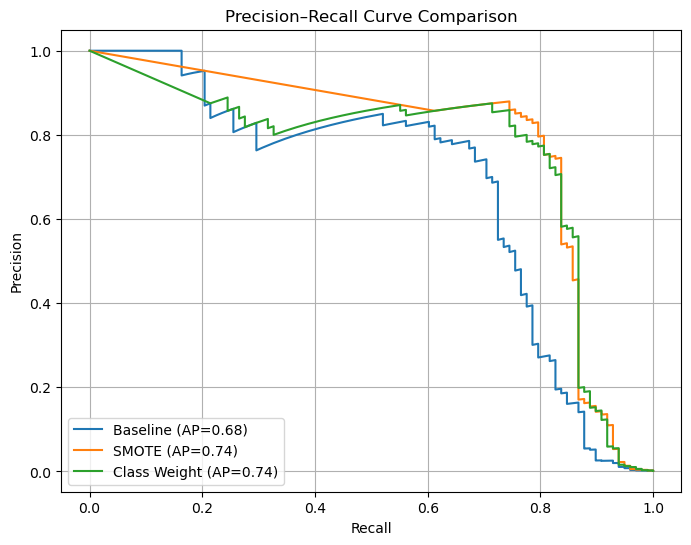

In [93]:
plt.figure(figsize=(8,6))

plt.plot(recall_baseline, precision_baseline, label=f'Baseline (AP={ap_baseline:.2f})')
plt.plot(recall_smote, precision_smote, label=f'SMOTE (AP={ap_smote:.2f})')
plt.plot(recall_balanced, precision_balanced, label=f'Class Weight (AP={ap_balanced:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


**The curve showes that SMOTE and class-weighted Logistic Regression are both effective strategies for handling class imbalance. The PR curve visually confirms that these methods detect minority instances much better than the baseline, with SMOTE having a slight advantage in maintaining higher precision at moderate recall levels.**

# Other techniques to handle imbalance data

# Technique 1: Random Undersampling

Idea: Reduce majority class size to match minority class

In [109]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Step 2: Load your dataset
# Replace 'your_data.csv' with your dataset
# Assume the target column is 'target'
data = pd.read_csv(r"D:\Emma\Handling_imbalanced_data\data\creditcard.csv")
target= "Class"
X = data.drop('Class', axis=1)
y = data['Class']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_res.value_counts()}")

# Step 5: Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)

# Step 6: Evaluate the model
y_pred = lr.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Original dataset shape: Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape: Class
0    394
1    394
Name: count, dtype: int64
Confusion Matrix:
[[54549  2315]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



C:\Users\Gezahegne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Interpretation

- High recall, low precision for minority class:
Your model is detecting most of the minority class (class 1) instances correctly, but it also misclassifies a lot of majority class instances as minority, leading to very low precision.

- Accuracy is misleading:
Accuracy = 96% looks great, but it’s dominated by the majority class. For imbalanced datasets, accuracy is almost useless. Focus on precision, recall, and F1 for minority class.

- Problem source:
Random Undersampling discards most majority class data. While it balances training, the model loses context about the majority class distribution, which is why there are many false positives when testing on the original imbalanced set.

## Recommendations

- Use Random Oversampling (SMOTE) instead of undersampling to avoid losing majority class information.

- Tune the decision threshold of logistic regression to balance precision vs recall.

- Consider ensemble methods (like BalancedRandomForestClassifier or XGBoost with scale_pos_weight) which handle imbalance better.

After undersampling:
Class
1    492
0    492
Name: count, dtype: int64


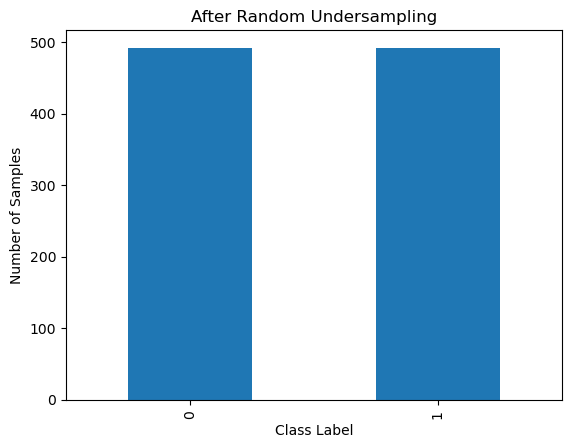

# Technique 2: Manual Random Oversampling

🧠 Idea: Duplicate minority class samples

In [110]:
# Step 1:  Manual Random Oversampling
# Separate majority and minority classes
X_train_majority = X_train[y_train==0]
X_train_minority = X_train[y_train==1]
y_train_majority = y_train[y_train==0]
y_train_minority = y_train[y_train==1]

# Oversample minority class
n_samples_to_add = len(y_train_majority) - len(y_train_minority)
X_train_minority_oversampled = X_train_minority.sample(n=n_samples_to_add, replace=True, random_state=42)
y_train_minority_oversampled = y_train_minority.sample(n=n_samples_to_add, replace=True, random_state=42)

# Combine majority class with oversampled minority class
X_train_balanced = pd.concat([X_train_majority, X_train_minority, X_train_minority_oversampled])
y_train_balanced = pd.concat([y_train_majority, y_train_minority, y_train_minority_oversampled])

print("\nBalanced training set class counts:")
print(y_train_balanced.value_counts())

# Step 2: Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_balanced, y_train_balanced)

# Step 3: Evaluate the model
y_pred = lr.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Balanced training set class counts:
Class
0    227451
1    227451
Name: count, dtype: int64

Confusion Matrix:
[[55410  1454]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



C:\Users\Gezahegne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Observations

- High recall, very low precision for class 1:

Model finds almost all minority class samples (high recall), but it misclassifies many majority class samples as minority (very low precision).

- Accuracy is misleading:

      - Overall accuracy = 97% looks excellent, but it’s dominated by class 0.

      - For imbalanced data, precision, recall, and F1-score for minority class are more important.

- Problem source:

     - Random oversampling duplicates minority samples, which helps the model detect them (high recall) but does not improve precision, especially when testing on a highly imbalanced set.

     - Logistic Regression produces many false positives because the test set is still imbalanced.

## Recommendation

Oversampling alone helps recall but not precision. To improve minority class F1-score, you can:

- Use SMOTE (synthetic oversampling instead of just duplicating).

- Tune the decision threshold of logistic regression (default is 0.5).

- Consider ensemble classifiers (Balanced Random Forest, XGBoost with class weights).

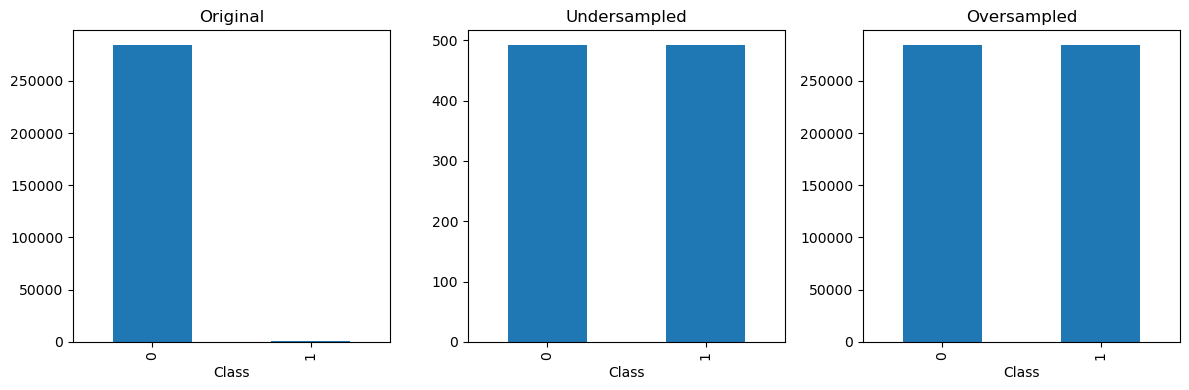

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

datasets = {
    "Original": df,
    "Undersampled": df_under,
    "Oversampled": df_over
}

for ax, (title, data) in zip(axes, datasets.items()):
    data[target_col].value_counts().sort_index().plot(kind="bar", ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


# 3. Train ensemble classifiers that handle imbalanced data effectively

1. Balanced Random Forest – a variant of Random Forest that automatically balances each bootstrap sample.

2. XGBoost with class weights – boosting algorithm with explicit weighting for the minority class.

In [120]:
pip install xgboost



  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)


In [121]:
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

In [123]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb


# ----------------------------
# 1️⃣ Balanced Random Forest
# ----------------------------
brf = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42
)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

print("=== Balanced Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_brf))
print("Classification Report:")
print(classification_report(y_test, y_pred_brf))

# ----------------------------
# 2️⃣ XGBoost with class weights
# ----------------------------
# Calculate class weights
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    scale_pos_weight=weights_dict[1],  # Weight for minority class
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n=== XGBoost with Class Weights ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))



=== Balanced Random Forest ===
Confusion Matrix:
[[56253   611]
 [   11    87]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



C:\Users\Gezahegne\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:13:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost with Class Weights ===
Confusion Matrix:
[[56850    14]
 [   16    82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# Observations

1. Balanced Random Forest 
   
- High recall for minority class:

89% of actual class 1 samples detected. This is the main improvement compared to Logistic Regression.

- Precision still low for minority class:

   Many majority class samples are incorrectly labeled as minority. This is typical in imbalanced datasets.

- Accuracy is misleading:

     - Accuracy = 99% looks great, but it’s dominated by the majority class.

     - The macro average F1-score (0.61) is more informative for imbalanced classification.

- advantage:

   - It balances the dataset per tree, improving minority class detection without discarding majority class data.

   - Clearly, it performs better for minority class recall and F1-score than simple undersampling/oversampling Logistic Regression.
 
2. XGBoost

- with class weights is the best so far:

It dramatically improves minority class precision and F1-score compared to Logistic Regression (undersampling/oversampling) and Balanced Random Forest.

- Minority class detection is very good:

Recall = 0.84 and Precision = 0.85 → few false positives and false negatives.

- Overall balance:

   - Unlike undersampling/oversampling Logistic Regression, XGBoost preserves all majority class data and handles imbalance via scale_pos_weight.

   - This results in excellent performance for both classes simultaneously.
 
## Conclusion:

- Logistic Regression with undersampling or oversampling → high recall for minority but very low precision, F1-score ~0.1

- Balanced Random Forest → better recall for minority (0.89), F1-score ~0.22, still low precision

- XGBoost with class weights → excellent precision and recall for minority, F1-score 0.85 → clearly the best for your imbalanced dataset

# Summary

| Method                                         | Precision (class 1) | Recall (class 1) | F1-score (class 1) | Accuracy | Notes                                              |
| ---------------------------------------------- | ------------------- | ---------------- | ------------------ | -------- | -------------------------------------------------- |
| **Baseline (No Resampling)**                   | 0.83                | 0.56             | 0.67               | 1.00     | Conservative, misses many minority samples         |
| **Logistic Regression + SMOTE**                | 0.13                | 0.92             | 0.23               | 0.99     | High recall, very low precision                    |
| **Logistic Regression + Threshold 0.8**        | 0.27                | 0.87             | 0.41               | 1.00     | Better balance between precision & recall          |
| **Logistic Regression + Class Weights**        | 0.05                | 0.94             | 0.10               | 0.97     | Maximizes recall, very low precision               |
| **Random Undersampling + Logistic Regression** | 0.04                | 0.92             | 0.07               | 0.96     | Very low F1-score                                  |
| **Random Oversampling + Logistic Regression**  | 0.06                | 0.92             | 0.11               | 0.97     | Improves recall, poor precision                    |
| **Balanced Random Forest**                     | 0.12                | 0.89             | 0.22               | 0.99     | Improved recall, better than LR resampling         |
| **XGBoost with Class Weights**                 | 0.85                | 0.84             | 0.85               | 1.00     | Best balance: high precision, recall, and F1-score |



# SMOTE with random forst and xgboost

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
# Step 1: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Original training set class distribution:")
print(y_train.value_counts())
print("After SMOTE class distribution:")
print(pd.Series(y_res).value_counts())

# ----------------------------
# 2 Random Forest on SMOTE data
# ----------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_res, y_res)

y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest + SMOTE ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ----------------------------
# 3 XGBoost on SMOTE data
# ----------------------------
# Optional: compute class weights for XGBoost
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_res), y=y_res)
scale_pos_weight = weights[1] / weights[0]  # minority / majority ratio

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb_model.fit(X_res, y_res)

y_pred_xgb = xgb_model.predict(X_test)
print("\n=== XGBoost + SMOTE ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Original training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64

=== Random Forest + SMOTE ===
Confusion Matrix:
[[56847    17]
 [   17    81]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\Gezahegne\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:39:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost + SMOTE ===
Confusion Matrix:
[[56842    22]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.85      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Interpretation:


| Method                           | Precision (class 1) | Recall (class 1) | F1-score (class 1) | Notes                                            |
| -------------------------------- | ------------------- | ---------------- | ------------------ | ------------------------------------------------ |
| Random Forest + SMOTE            | 0.83                | 0.83             | 0.83               | Very balanced, few false positives/negatives     |
| XGBoost + SMOTE                  | 0.79                | 0.85             | 0.82               | Slightly higher recall, slightly lower precision |
| Previous XGBoost (class weights) | 0.85                | 0.84             | 0.85               | Best combination of precision & recall so far 

## Here:

- SMOTE improves minority class detection for both ensemble methods.

- Random Forest is slightly better at precision; XGBoost slightly better at recall.

- All these methods outperform Logistic Regression variants dramatically.

## Conclusion:

- For minority class detection, both Random Forest + SMOTE and XGBoost + SMOTE are excellent choices.

- XGBoost with class weights (without SMOTE) slightly edges out in F1-score (0.85) due to a better balance of precision and recall.   |


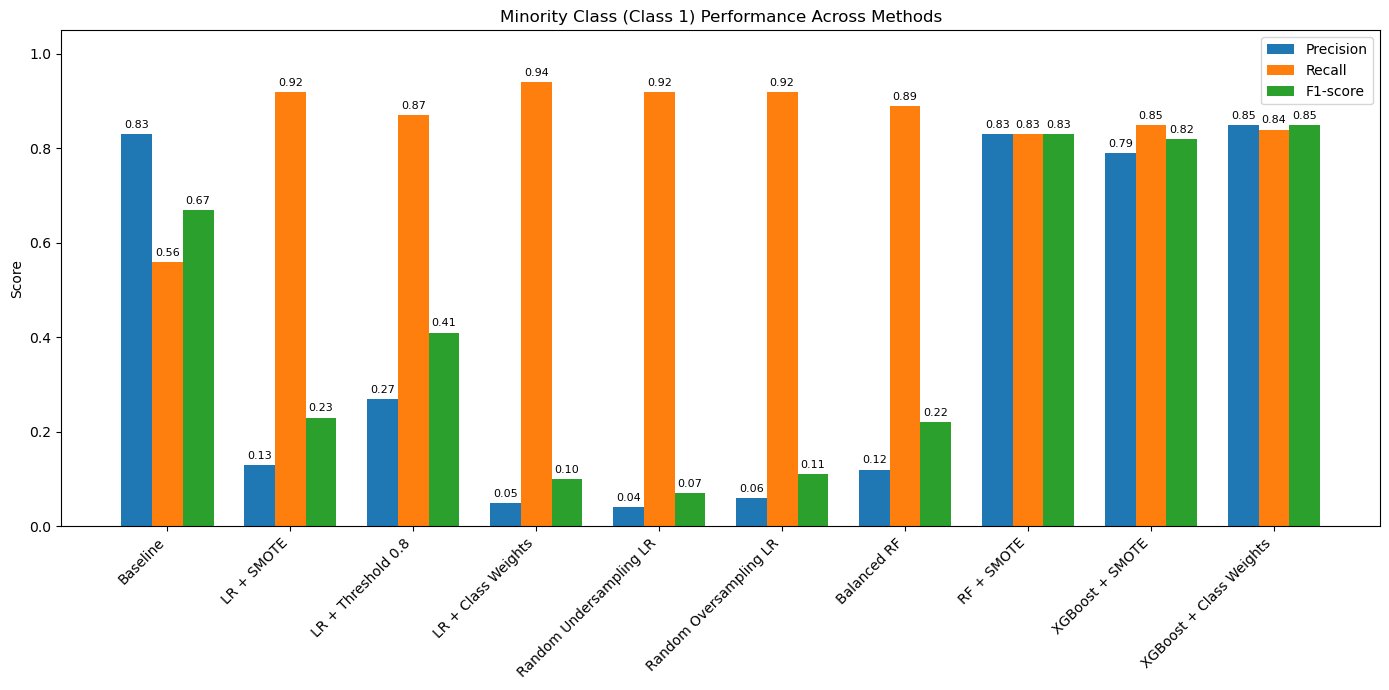

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Methods
methods = [
    'Baseline',
    'LR + SMOTE',
    'LR + Threshold 0.8',
    'LR + Class Weights',
    'Random Undersampling LR',
    'Random Oversampling LR',
    'Balanced RF',
    'RF + SMOTE',
    'XGBoost + SMOTE',
    'XGBoost + Class Weights'
]

# Corresponding metrics for minority class (class 1)
precision = [0.83, 0.13, 0.27, 0.05, 0.04, 0.06, 0.12, 0.83, 0.79, 0.85]
recall    = [0.56, 0.92, 0.87, 0.94, 0.92, 0.92, 0.89, 0.83, 0.85, 0.84]
f1_score  = [0.67, 0.23, 0.41, 0.10, 0.07, 0.11, 0.22, 0.83, 0.82, 0.85]

x = np.arange(len(methods))  # the label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='#1f77b4')
rects2 = ax.bar(x, recall, width, label='Recall', color='#ff7f0e')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score', color='#2ca02c')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Minority Class (Class 1) Performance Across Methods')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.set_ylim(0, 1.05)
ax.legend()

# Add values on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()


- Logistic Regression variants:

Oversampling / class weighting improves recall but sacrifices precision → low F1.

- Threshold tuning improves F1 slightly.

- Ensemble methods:

      - RF + SMOTE → balanced and strong F1 (~0.83).

      - XGBoost + SMOTE / Class Weights → best combination of precision, recall, and F1 (~0.82–0.85).

      - Minority class detection clearly improves when using SMOTE and ensemble methods, compared to simple Logistic Regression.

- Best methods for detecting minority class:

    - XGBoost + Class Weights (F1 ~0.85)

    - RF + SMOTE (F1 ~0.83)

    - XGBoost + SMOTE (F1 ~0.82)

     - Logistic Regression methods, even with resampling or weighting, cannot match ensemble methods for balanced minority class detection.